In [1]:
%matplotlib inline
from rdkit import rdBase
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from mhfp.encoder import MHFPEncoder
mhfp_encoder = MHFPEncoder()
print(rdBase.rdkitVersion)

2018.03.4


In [2]:
mols = [mol for mol in Chem.SDMolSupplier('cdk2.sdf') if mol != None]
for mol in mols:
    AllChem.Compute2DCoords(mol)
nmols = len(mols)
#Calc morgan fp
mg2fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 3) for mol in mols]
#Calc min hash fp
mhfps = [mhfp_encoder.encode_mol(mol) for mol in mols]

In [3]:
tanimoto_sim = []
mg_sim_mols = []
for i in range(nmols):
    for j in range(i):
        tc = DataStructs.TanimotoSimilarity(mg2fps[i], mg2fps[j])
        if tc >= 0.5:
            mg_sim_mols.append([mols[i], mols[j]])
        tanimoto_sim.append(tc)

In [4]:
mhfps_sim = []
mhfps_sim_mols = []
for i in range(nmols):
    for j in range(i):
        jaccard = 1. - MHFPEncoder.distance(mhfps[i], mhfps[j])
        if jaccard >= 0.5:
            mhfps_sim_mols .append([mols[i], mols[j]])        
        mhfps_sim.append(jaccard)

In [5]:
a, b = np.polyfit(tanimoto_sim, mhfps_sim, 1)
y2 = np.int64(a) * tanimoto_sim + np.int64(b)
print(a, b)

1.033917242502858 -0.031604772419224866


Text(0, 0.5, 'mhfp sim')

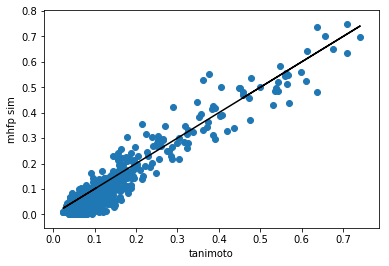

In [6]:
plt.scatter(tanimoto_sim, mhfps_sim)
plt.plot(tanimoto_sim, y2, color='black')
plt.xlabel('tanimoto')
plt.ylabel('mhfp sim')

### MorganFP / Tanimoto

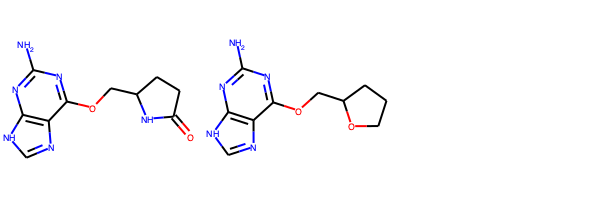

In [7]:
Draw.MolsToGridImage(mg_sim_mols[0])

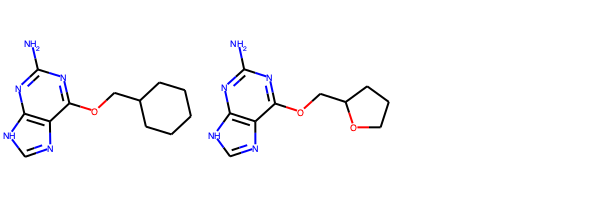

In [8]:
Draw.MolsToGridImage(mg_sim_mols[1])

### MHFP6

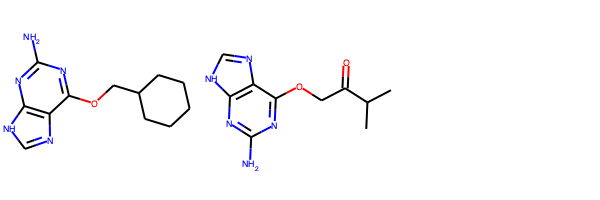

In [9]:
Draw.MolsToGridImage(mhfps_sim_mols[0])

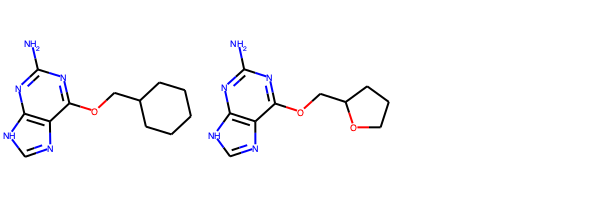

In [10]:
Draw.MolsToGridImage(mhfps_sim_mols[1])